In [169]:
#Random Forest Classifier Example

#Predict/classify which number is in the image shown
#Each datapoint is a 8x8 image of a digit.
#10 classes and roughly 180 samples per class

#https://www.youtube.com/watch?v=v6VJ2RO66Ag&list=PLM8wYQRetTxAIU0oOarQeW2WOeYV9LyuG&index=14&t=52s

#Import Libraries and data
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

dir(digits)

#df_digits = pd.DataFrame(digits)

#print(digits)

#digits.head()



['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

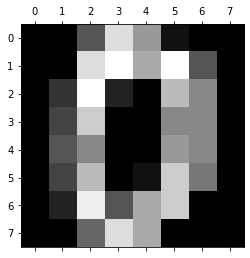

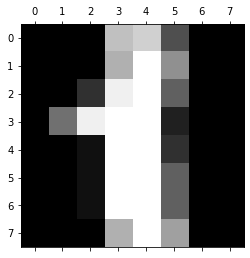

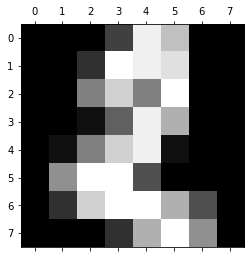

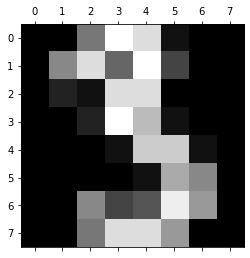

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [171]:
#Create a pandas dataframe from data
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [172]:
df['target'] = digits.target 
df.head()



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [173]:
#X will be the set of pixels
X = df.drop('target',axis='columns')

#y will be the "number" written in the image
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [174]:
#Train the data

#use ensemble when you use multiple algorithms/trees to eventually take majority voting in random forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30) #estimators will be your number of trees
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [175]:
model.score(X_test, y_test)

0.9638888888888889

In [176]:
y_predicted = model.predict(X_test)

print(y_predicted)

[3 9 0 4 6 7 4 6 5 2 4 4 7 1 0 9 7 7 6 7 6 5 4 1 8 5 6 0 4 7 8 8 9 9 4 2 6
 2 3 7 4 2 9 9 7 6 2 1 6 9 0 8 0 5 4 4 2 8 7 6 8 5 2 1 2 6 3 2 3 5 1 4 6 6
 4 9 4 4 4 5 8 6 5 8 5 5 9 3 2 1 6 3 1 1 9 8 5 3 9 7 7 8 0 4 8 3 0 8 3 8 4
 5 9 0 9 5 8 9 6 5 9 3 4 5 5 1 3 1 5 5 3 4 8 5 1 7 3 5 0 1 2 3 9 0 4 3 1 3
 0 0 7 1 6 5 1 0 3 6 2 7 6 2 4 4 8 5 3 7 3 1 0 1 0 7 1 8 4 6 1 0 8 3 2 6 0
 3 7 7 0 8 4 0 0 5 5 3 0 3 1 2 5 9 8 3 7 7 2 4 7 4 5 0 7 0 3 5 3 6 3 5 7 1
 9 1 1 5 5 2 3 2 3 1 0 0 3 0 5 8 1 7 0 5 2 0 7 7 5 4 9 2 5 5 0 3 3 8 9 8 2
 5 5 5 6 2 7 7 0 7 6 3 0 9 7 3 4 1 9 1 1 7 3 7 6 3 4 7 6 4 6 7 8 5 2 0 7 3
 1 0 1 6 7 3 0 5 4 9 6 0 1 4 5 1 6 4 2 7 5 8 2 4 4 3 6 3 2 6 9 9 1 7 2 5 9
 0 8 3 9 8 9 4 6 7 2 6 4 9 8 0 2 2 9 9 9 4 4 1 5 0 5 8]


Text(69.0, 0.5, 'Truth')

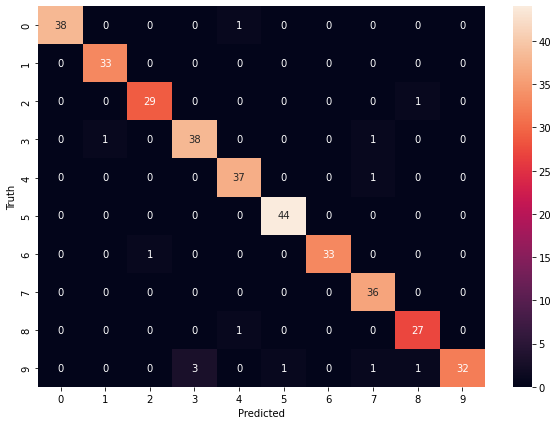

In [177]:
#create a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [178]:
#for handwritten zero it predicted very well
#for handwritten five it didn't predict as well